*Input Feature Extraction*

In order to enhance the image, we are: Increasing the contrast, Increasing the Shadows, Increasing the Sharpness

All of these help in capturing the upcoming required input parameters

In [1]:
img_path = r"C:\Users\shent\Documents\Sem 6\Computer Vision\Eggs\Testing photos\candlingeggs.webp"

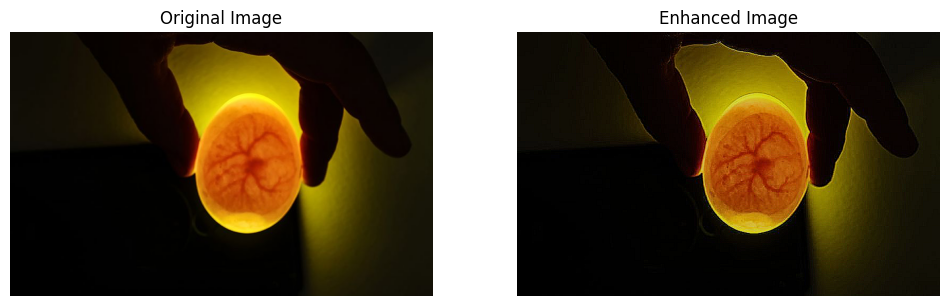

Enhanced image saved successfully at: C:\Users\shent\Documents\Sem 6\Computer Vision\Eggs\Testing photos\Test_enhanced.jpg


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# File path of the image
image_path = img_path

# Load the image
img = cv2.imread(image_path)

# Check if the image was loaded successfully
if img is None:
    print("Error: Unable to load the image. Please check the file path.")
else:
    # Increase sharpness
    sharpen_kernel = np.array([[-1, -1, -1],
                               [-1, 9, -1],
                               [-1, -1, -1]])
    sharpened_img = cv2.filter2D(img, -1, sharpen_kernel)

    # Increase shadows
    alpha = 0.85  # Contrast control (1.0-3.0)
    beta = 0    # Brightness control (0-100)
    shadows_img = cv2.convertScaleAbs(sharpened_img, alpha=alpha, beta=beta)

    # Save the enhanced image
    output_path = r"C:\Users\shent\Documents\Sem 6\Computer Vision\Eggs\Testing photos\Test_enhanced.jpg"
    cv2.imwrite(output_path, shadows_img)

    # Display original and enhanced images side by side
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(shadows_img, cv2.COLOR_BGR2RGB))
    plt.title('Enhanced Image')
    plt.axis('off')

    plt.show()

    print("Enhanced image saved successfully at:", output_path)

In [3]:
img_path = output_path

1. Presence of veins or embryo structures (To confirm fertility along with the embryo matter)
and also Size of the veins or embryo structures (To verify if they're actual veins or just cracks)

Applying edge detection algorithms (Canny edge detector) to identify edges and boundaries within the egg images.
Using blob detection algorithms to identify regions of interest that may correspond to veins or embryo structures.

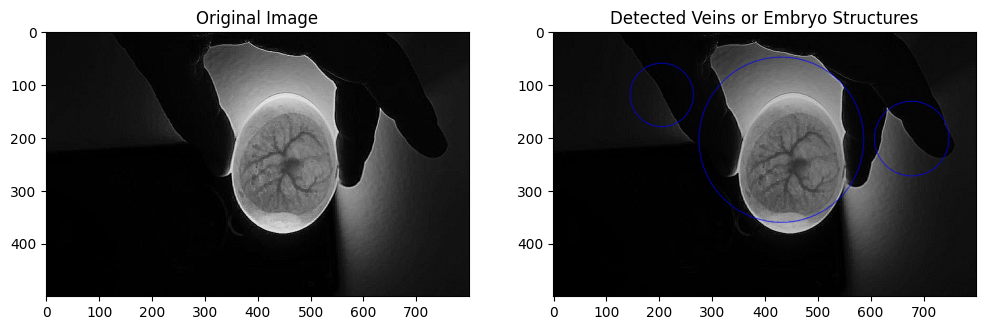

Average size of detected veins or embryo structures: 190.82221476236978


In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the egg image
egg_image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded successfully
if egg_image is None:
    print("Error: Could not read the image.")
    exit()

# Step 1: Preprocess the image (e.g., smoothing)
preprocessed_image = cv2.GaussianBlur(egg_image, (5, 5), 0)

# Step 2: Edge detection using Canny edge detector
edges = cv2.Canny(preprocessed_image, 50, 150)

# Step 3: Blob detection
params = cv2.SimpleBlobDetector_Params()
params.minThreshold = 10
params.maxThreshold = 200
params.filterByArea = True
params.minArea = 100
params.filterByCircularity = False
params.filterByConvexity = False
params.filterByInertia = False

detector = cv2.SimpleBlobDetector_create(params)

# Detect keypoints
keypoints = detector.detect(edges)

# Draw keypoints on the original image
keypoints_image = cv2.drawKeypoints(egg_image, keypoints, np.array([]), (0, 0, 255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(egg_image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(keypoints_image)
plt.title('Detected Veins or Embryo Structures')
plt.show()

# Measure size of veins or embryo structures
if keypoints:
    vein_sizes = [key.size for key in keypoints]
    average_size = np.mean(vein_sizes)
    print("Average size of detected veins or embryo structures:", average_size)
else:
    print("No keypoints detected.")

2) Average color intensity of the egg, Color distribution (histogram of color channels)
Differences in color intensity and distribution may indicate variations in eggshell transparency, which can be associated with fertility

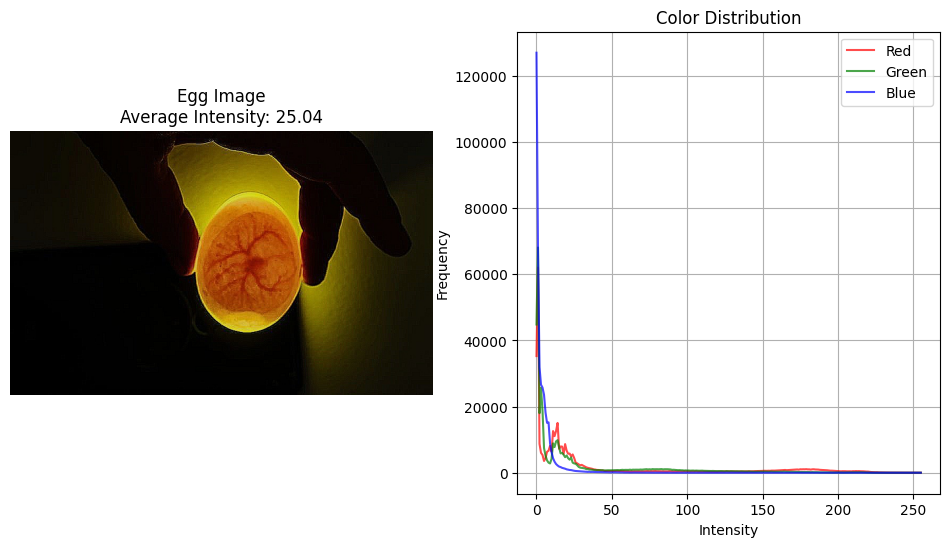

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the egg image
egg_image = cv2.imread(img_path)

# Convert image to RGB (OpenCV reads images in BGR format)
egg_image_rgb = cv2.cvtColor(egg_image, cv2.COLOR_BGR2RGB)

# Calculate average color intensity
average_intensity = np.mean(egg_image_rgb)

# Calculate color distribution (histogram of color channels)
hist_r = cv2.calcHist([egg_image_rgb], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([egg_image_rgb], [1], None, [256], [0, 256])
hist_b = cv2.calcHist([egg_image_rgb], [2], None, [256], [0, 256])

# Visualize the results
plt.figure(figsize=(12, 6))

# Plot average color intensity
plt.subplot(1, 2, 1)
plt.imshow(egg_image_rgb)
plt.title('Egg Image\nAverage Intensity: {:.2f}'.format(average_intensity))
plt.axis('off')

# Plot color distribution (histogram of color channels)
plt.subplot(1, 2, 2)
plt.plot(hist_r, color='red', label='Red', alpha=0.7)
plt.plot(hist_g, color='green', label='Green', alpha=0.7)
plt.plot(hist_b, color='blue', label='Blue', alpha=0.7)
plt.title('Color Distribution')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

plt.show()

3. Mean, standard deviation, skewness, and kurtosis of pixel intensities and their Histogram features
Statistical features of pixel intensities can capture overall trends and distributions in the image, which may vary between fertile and infertile eggs. For instance, statistical moments like skewness and kurtosis can characterize the shape of intensity histograms, potentially revealing differences between the two classes.

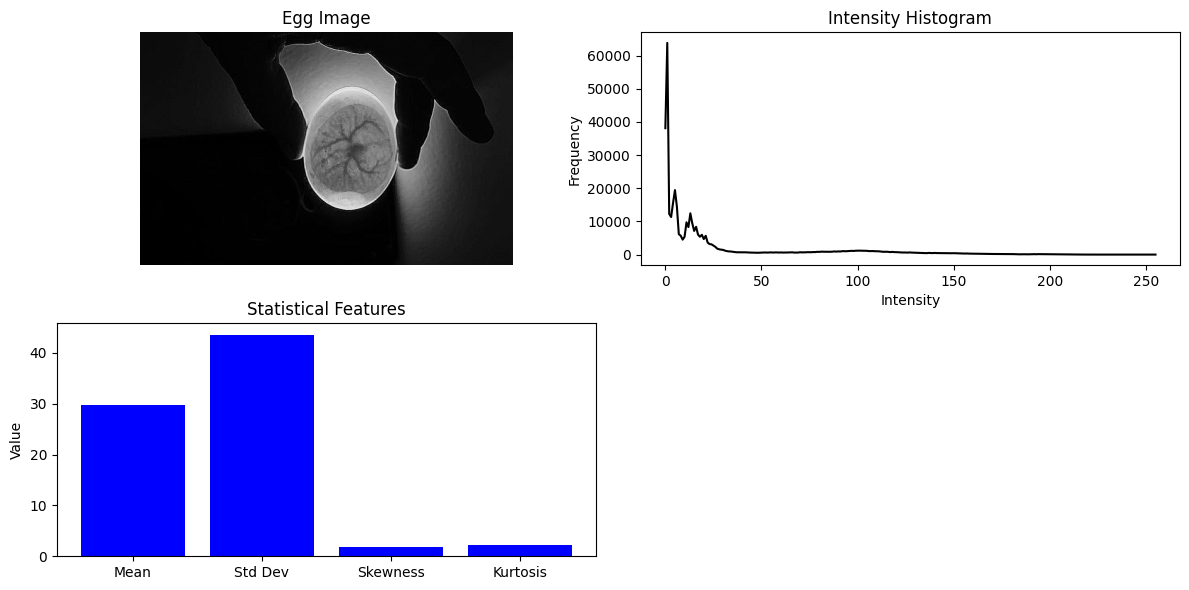

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

# Read the egg image
egg_image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Calculate statistical features of pixel intensities
mean_intensity = np.mean(egg_image)
std_dev_intensity = np.std(egg_image)
skewness_intensity = skew(egg_image.flatten())
kurtosis_intensity = kurtosis(egg_image.flatten())

# Calculate histogram of pixel intensities
hist_intensity = cv2.calcHist([egg_image], [0], None, [256], [0, 256])

# Visualize the results
plt.figure(figsize=(12, 6))

# Plot the image and its histogram
plt.subplot(2, 2, 1)
plt.imshow(egg_image, cmap='gray')
plt.title('Egg Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.plot(hist_intensity, color='black')
plt.title('Intensity Histogram')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

# Plot statistical features
plt.subplot(2, 2, 3)
plt.bar(['Mean', 'Std Dev', 'Skewness', 'Kurtosis'], [mean_intensity, std_dev_intensity, skewness_intensity, kurtosis_intensity], color='blue')
plt.title('Statistical Features')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

4. Local features like SIFT (Scale-Invariant Feature Transform) keypoints and descriptors SURF (Speeded Up Robust Features) keypoints and descriptors
These keypoints can capture distinctive regions or structures within the egg images, which may correspond to important fertility-related characteristics such as vein patterns or embryo formations.

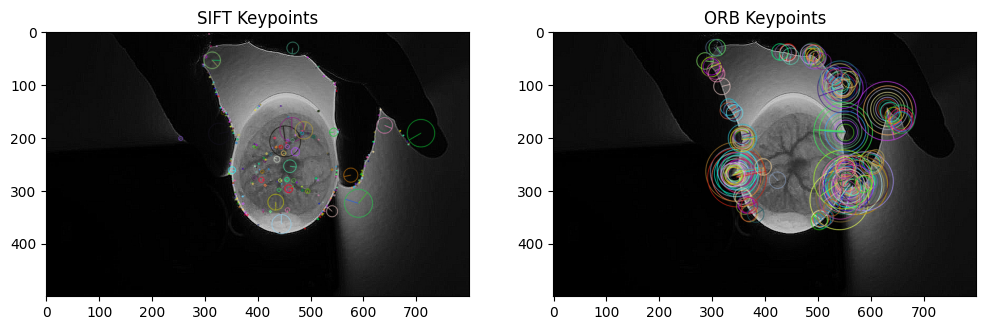

In [19]:
import cv2
import matplotlib.pyplot as plt

# Read the egg image
egg_image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Initialize SIFT and ORB detectors
sift = cv2.SIFT_create()
orb = cv2.ORB_create()

# Detect keypoints and compute descriptors using SIFT
keypoints_sift, descriptors_sift = sift.detectAndCompute(egg_image, None)

# Sort keypoints based on response value
keypoints_orb = sorted(keypoints_orb, key=lambda x: x.response, reverse=True)

# Set the maximum number of keypoints to be displayed
max_keypoints = 180  # Adjust this number as needed

# Visualize the keypoints on the egg image
sift_img = cv2.drawKeypoints(egg_image, keypoints_sift, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
orb_img = cv2.drawKeypoints(egg_image, keypoints_orb[:max_keypoints], None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(sift_img)
plt.title('SIFT Keypoints')

plt.subplot(1, 2, 2)
plt.imshow(orb_img)
plt.title('ORB Keypoints')

plt.show()

SIFT keypoints represent distinctive and informative regions within an image that are invariant to translation, rotation, scale, and other imaging parameters which can be used to map, find similarities among the images 

ORB (Oriented FAST and Rotated BRIEF) keypoints are another type of feature points used in computer vision for tasks such as image matching, object recognition, and tracking. ORB keypoints, like SIFT keypoints, represent distinctive regions within an image that are invariant to changes in scale, rotation, and illumination.